In [2]:
# import tools

import cv2
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# load battery image

btr = cv2.imread('data/images/sample_image.png')

btr_rgb = cv2.cvtColor(btr,cv2.COLOR_BGR2RGB)
btr_gry = cv2.cvtColor(btr,cv2.COLOR_BGR2GRAY)
threshold, btr_thr = cv2.threshold(btr_gry,150,255,cv2.THRESH_BINARY)

wb,hb,cb = btr.shape
btr_blank = np.zeros((wb,hb,cb),np.uint8) 
btr_blank1 = np.zeros_like(btr,np.uint8) # same as above

5


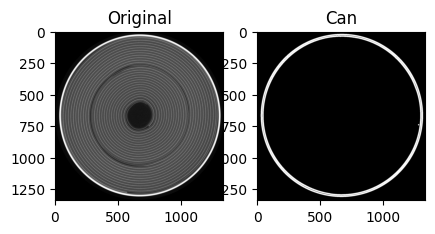

In [4]:
# find the contours of the can and display

contours_can,hierarchy = cv2.findContours(btr_thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contours_can = sorted(contours_can, key=cv2.contourArea, reverse=True)

btr_can = btr_blank.copy()

cv2.drawContours(btr_can,contours_can,-1,(255,255,255),10)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(btr)

plt.subplot(1,4,2)
plt.title('Can')
plt.imshow(btr_can)

print(len(contours_can))

In [6]:
# find radius and origin of inner and outer contours of can

otr, inn = contours_can[0], contours_can[1]

oa, ia = cv2.contourArea(otr), cv2.contourArea(inn)

om, im = cv2.moments(otr), cv2.moments(inn)

oma, ima = int(om['m00']), int(im['m00'])

ox, oy = int(om['m10']/om['m00']), int(om['m01']/om['m00'])

ix, iy = int(im['m10']/im['m00']), int(im['m01']/im['m00'])

print(len(otr),len(inn))
print(oa, ia)
print(oma,ima)
print(ox,oy)
print(ix,iy)

1851 1934
1286151.0 1236771.5
1286151 1236771
672 669
672 669


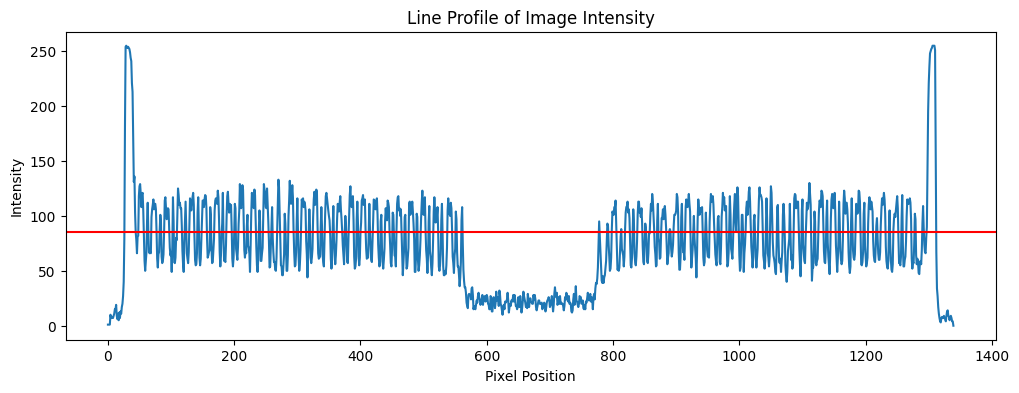

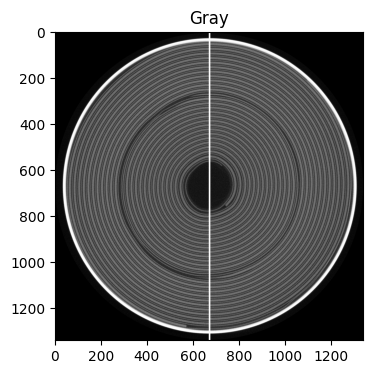

In [7]:
# find the center line of the grayscale battery
# display

cnt_gry = btr_gry[:,ox]

btr_gry_cnt = btr_gry.copy()

# draw line through gray image
cv2.line(btr_gry_cnt,(ox,0),(ox,hb),(255),5)

plt.figure(figsize=(12,4))
plt.plot(cnt_gry)
plt.axhline(y=85, color="r", linestyle="-")
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Line Profile of Image Intensity')
plt.show()

plt.figure(figsize=(4,4))
plt.title("Gray")
plt.imshow(btr_gry_cnt, cmap='gray')
plt.show()

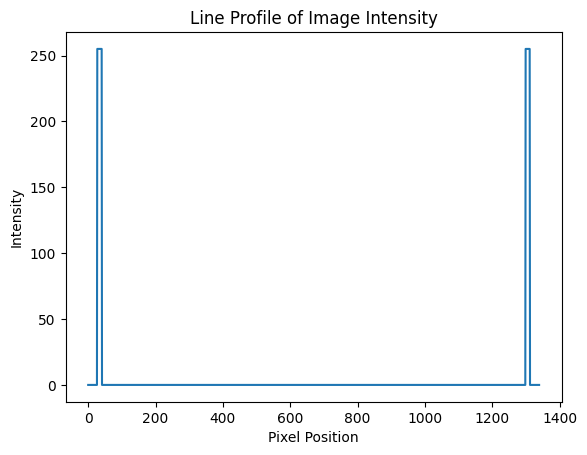

In [8]:
# find the center line of the threshold 
# display

cnt_thr = btr_thr[:,ox]

plt.plot(cnt_thr)
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Line Profile of Image Intensity')
plt.show()

In [9]:
# create a list of indices where the for the can
positions = []

for idx,val in enumerate(cnt_thr):
    if val>250:
        positions.append(idx)
        
strt, end = positions[0], positions[-1]

print("Start and End of can",strt,end)
print("Diameter of can",end-strt)
print("Can indices",positions)
            

Start and End of can 27 1311
Diameter of can 1284
Can indices [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311]


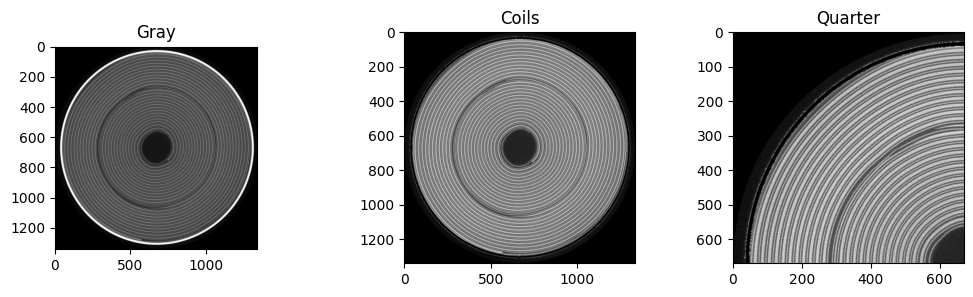

In [11]:
# apply mask to select for coils alone

btr_thr_blr = cv2.GaussianBlur(btr_thr, (5,5), cv2.BORDER_DEFAULT)
btr_cn_nt = cv2.bitwise_not(btr_thr_blr)
btr_cl = cv2.bitwise_and(btr_gry,btr_cn_nt)

rows = hb//2
cols = wb//2

btr_cl_slc = btr_cl[0:rows,0:cols]

plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Coils")
plt.imshow(btr_cl, cmap='gray')

plt.subplot(1,3,3)
plt.title("Quarter")
plt.imshow(btr_cl_slc, cmap='gray')

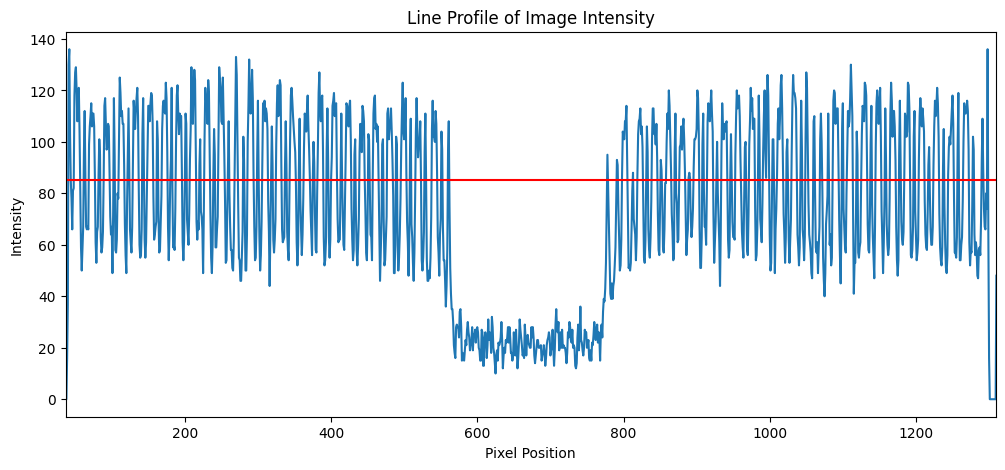

In [12]:
# find center line for coils
# can also use the ox line
cnt_cl = btr_cl[:,ox]

plt.figure(figsize=(12,5))
plt.plot(cnt_cl)
plt.axhline(y=85,color="r",linestyle="-")
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.xlim(37,1309)
plt.title('Line Profile of Image Intensity')
plt.show()

In [13]:
# found the number of thin and thick coils in the first half

cls_l = list()
cls_d = defaultdict(int)
thc = 0

for idx in range(650):
    val = cnt_cl[idx]
    if val > 85:
        thc+=1
    elif thc > 0:
        cls_l.append(thc)
        thc = 0

for cl in cls_l:
    if cl <=4:
        cls_d['thin']+=1
    else:
        cls_d['thick']+=1

print(cls_d.items())

dict_items([('thin', 29), ('thick', 25)])


In [14]:
# found the number of thin and thick coils in the first half

cls_l = list()
cls_d = defaultdict(int)
thc = 0

for idx in range(700,1300):
    val = cnt_cl[idx]
    if val > 85:
        thc+=1
    elif thc > 0:
        cls_l.append(thc)
        thc = 0

for cl in cls_l:
    if cl <=4:
        cls_d['thin']+=1
    else:
        cls_d['thick']+=1

print(cls_d.items())

dict_items([('thin', 31), ('thick', 23)])
